# Projeto: Banco de Dados para Plataforma de Streaming

Este notebook implementa a modelagem de dados de uma plataforma de streaming, como a Netflix, utilizando SQLite em Python.
Serão criadas tabelas para usuários, conteúdos, perfis, episódios, progresso de visualização e mais.

Ferramentas utilizadas:
- Python
- SQLite (`sqlite3`)

#### 2. Conexão com o banco

In [8]:
import sqlite3

# Conectar ao banco de dados (cria um arquivo local)
conn = sqlite3.connect("streaming.db")
cursor = conn.cursor()

#### Passo 3: Conectar no MySQL

In [9]:
# Tabela: Planos
cursor.execute("""
CREATE TABLE IF NOT EXISTS planos (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT NOT NULL,
    preco_mensal REAL NOT NULL,
    qualidade TEXT,
    telas INTEGER
);
""")

# Tabela: Usuários
cursor.execute("""
CREATE TABLE IF NOT EXISTS usuarios (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    senha TEXT NOT NULL,
    data_nascimento DATE,
    plano_id INTEGER,
    criado_em TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (plano_id) REFERENCES planos(id)
);
""")

# Tabela: Perfis
cursor.execute("""
CREATE TABLE IF NOT EXISTS perfis (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    usuario_id INTEGER,
    nome TEXT NOT NULL,
    idade_minima INTEGER,
    FOREIGN KEY (usuario_id) REFERENCES usuarios(id)
);
""")

# Tabela: Conteúdo
cursor.execute("""
CREATE TABLE IF NOT EXISTS conteudo (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    titulo TEXT NOT NULL,
    descricao TEXT,
    tipo TEXT CHECK(tipo IN ('Filme', 'Série', 'Documentário')),
    ano_lancamento INTEGER,
    classificacao TEXT,
    duracao_minutos INTEGER,
    capa_url TEXT
);
""")

# Tabela: Episódios
cursor.execute("""
CREATE TABLE IF NOT EXISTS episodios (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    conteudo_id INTEGER,
    temporada INTEGER,
    numero INTEGER,
    titulo TEXT,
    duracao_minutos INTEGER,
    FOREIGN KEY (conteudo_id) REFERENCES conteudo(id)
);
""")

# Tabela: Gêneros
cursor.execute("""
CREATE TABLE IF NOT EXISTS generos (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT UNIQUE NOT NULL
);
""")

# Tabela: Conteúdo_Gênero (Relacionamento N:N)
cursor.execute("""
CREATE TABLE IF NOT EXISTS conteudo_genero (
    conteudo_id INTEGER,
    genero_id INTEGER,
    FOREIGN KEY (conteudo_id) REFERENCES conteudo(id),
    FOREIGN KEY (genero_id) REFERENCES generos(id),
    PRIMARY KEY (conteudo_id, genero_id)
);
""")

# Tabela: Progresso de Visualização
cursor.execute("""
CREATE TABLE IF NOT EXISTS progresso_visualizacao (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    perfil_id INTEGER,
    conteudo_id INTEGER,
    episodio_id INTEGER,
    tempo_assistido INTEGER,
    finalizado BOOLEAN,
    atualizado_em TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (perfil_id) REFERENCES perfis(id),
    FOREIGN KEY (conteudo_id) REFERENCES conteudo(id),
    FOREIGN KEY (episodio_id) REFERENCES episodios(id)
);
""")

# Tabela: Avaliações
cursor.execute("""
CREATE TABLE IF NOT EXISTS avaliacoes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    perfil_id INTEGER,
    conteudo_id INTEGER,
    nota INTEGER CHECK(nota >= 1 AND nota <= 5),
    comentario TEXT,
    data_avaliacao TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (perfil_id) REFERENCES perfis(id),
    FOREIGN KEY (conteudo_id) REFERENCES conteudo(id)
);
""")

#### Verificar conexão

In [1]:
if conn.open():
    print("Conexão ativa!")
else:
    print("Banco de dados desconectado")

NameError: name 'conn' is not defined

In [ ]:
conn.pind(reconnect =True)

In [9]:
cursor.execute("SELECT DATABASE();")
cursor.fetchone()

(None,)

In [10]:
cursor.execute("SHOW DATABASES;")
cursor.fetchall()

(('information_schema',),
 ('meubanco',),
 ('mysql',),
 ('performance_schema',),
 ('sys',))

In [11]:
cursor.execute("USE meubanco")

0

In [12]:
cursor.execute("SELECT DATABASE();")
cursor.fetchone()

('meubanco',)

#### Passo 7: Criar tabela

In [16]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS produtos (
        id INT AUTO_INCREMENT PRIMARY KEY,
        titulo VARCHAR(255),
        preco DECIMAL (10,2),
        categoria VARCHAR(100)
)
''')


0

#### Passo 8: Inserir dados

In [19]:
dados = [("Note dell", 3500.00, "Eletrônicos"), ("Celular", 2500.00, "Eletrônicos"), ("Tablet", 1500.00, "Eletrônicos"), ("Monitor", 1100.00, "Eletrônicos")]

cursor.executemany("INSERT INTO produtos (titulo, preco, categoria) VALUES (%s, %s, %s)", dados)
conn.commit()

In [20]:
conn.close()

#### Passo 9: Visualizar no Workbench
- Clique em `meubanco` → abra a aba de queries.

Rode: `SELECT * FROM produtos;`

#### Passo 9: inserindo novos dados pelo Workbench
Ainda no Workbench, rode:

`INSERT INTO produtos (titulo, preco, categoria)`

`VALUES ("Mouse Gamer", 199.90, "Eletrônicos");`

#### Passo 10: Consulta de teste no Python

In [23]:
conn = pymysql.connect( host = 'localhost', user = 'root', password = 'root', database = "meubanco")
cursor =conn.cursor()

In [24]:
cursor.execute("SELECT * FROM produtos;")
cursor.fetchall()

((1, 'Note dell', Decimal('3500.00'), 'Eletrônicos'),
 (2, 'Celular', Decimal('2500.00'), 'Eletrônicos'),
 (3, 'Tablet', Decimal('1500.00'), 'Eletrônicos'),
 (4, 'Monitor', Decimal('1100.00'), 'Eletrônicos'),
 (5, 'wil', Decimal('2.00'), 'gay'))

# Neste exercício exploramos Python e Workbench no mesmo banco MySQL
- O banco é o mesmo: Python e Workbench são apenas **duas portas de acesso**.
- Você pode **criar, inserir e consultar** dados em um ambiente e ver os resultados no outro.
- Isso mostra a importância de **separar a camada de aplicação (Python) da camada de dados (MySQL).**

<div>
<img src=attachment:9ff4b6fb-bced-499a-b86a-8b1d6ec0935a.png width="600"/>
</div>
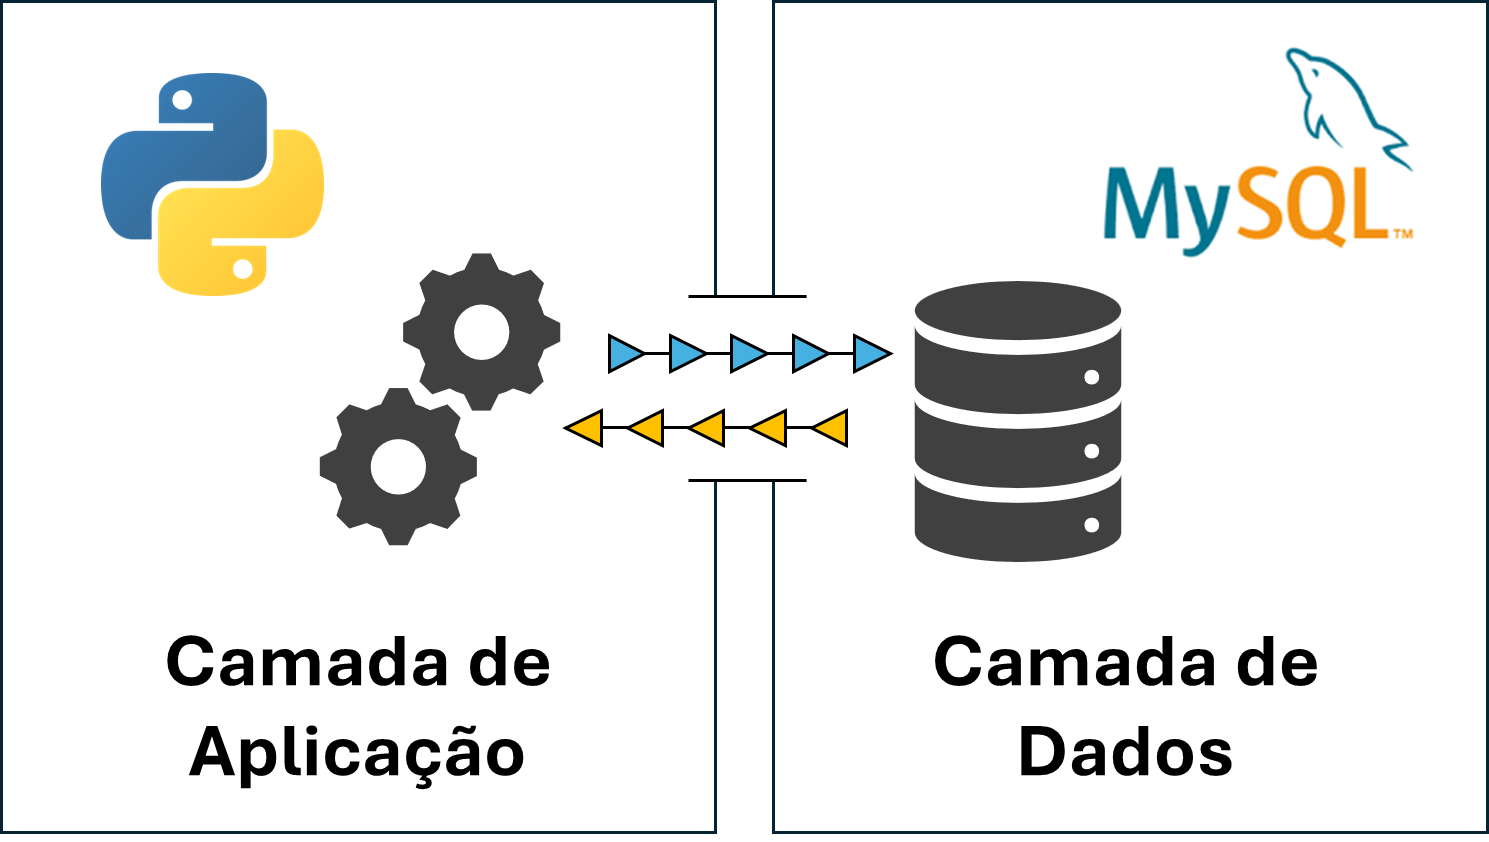

### Onde o banco de dados fica salvo? 

- Diferente do **SQLite** em que o banco é criado como **um arquivo** `.db` **no diretório atual** (mesma pasta do notebook/script)
- O **MySQL guarda os bancos em uma pasta interna do servido**. Geralmente em:
 
  `C:\ProgramData\MySQL\MySQL Server 8.0\Data\`
  
 **Atenção:** 
 - Essa pasta é oculta, tem que habilitar **Mostrar arquivos ocultos**
 - Você **não manipula diretamente esses arquivos**, sempre acessa via o servidor MySQL (Workbench, Python, terminal).

### Apagar o banco de dados

- Atenção! Esse comando apaga todo o banco de dados (tabelas, dados, índices, etc.).

- **Não há undo** – depois de rodar, não tem como recuperar a não ser que você tenha backup.

In [25]:
cursor.execute("DROP DATABASE meubanco")
conn.commit

<bound method Connection.commit of <pymysql.connections.Connection object at 0x000001B9C3CB09E0>>

In [26]:
conn.close()